In [6]:
import sys
sys.path.append('/mnt/apollo/bare_soil_xuemeng/scikit-map/')

from skmap.io import RasterData
from skmap.io import process
import os

from pathlib import Path
from minio import Minio
from eumap.misc import find_files, nan_percentile
from eumap.raster import read_rasters, save_rasters
import numpy as np
from minio.commonconfig import REPLACE, CopySource
import time as tm
import multiprocess as mp

tiles = ['006E_51N', '023E_52N']
# tiles = ['016E_63N','017E_63N','006W_53N','006W_52N','003E_52N','004E_52N','003E_51N','004E_51N','005E_52N','006E_52N','005E_51N',
#          '006E_51N','023E_52N','007E_46N','008E_46N','009E_44N','010E_44N','023E_38N','024E_38N','023E_37N','004W_36N']
years = list(range(2000,2022,1))
bands = ['blue','green','red','NIR','SWIR1','SWIR2'] #,'thermal'
periods = ['monthly','bimonthly']
doy = ['001','017','033','049','065','081','097','113','129','145','161','177','193','209','225','241','257','273','289','305','321','337','353']

In [7]:
def worker_barefrac(tile,year):
    tile = tile.replace('_','.')
    url_prefix = 'http://192.168.1.30:8333/tmp-bare-soil/16days/ndvi'
    local_prefix = f'/mnt/apollo/bare_soil_xuemeng/tmp_files/ndvi'
    
    files = [local_prefix+f'/{tile}/ndvi_{tile}_{year}{dd}.tif' for dd in doy]
    files = [Path(i) for i in files]
    ndvi,_ = read_rasters(raster_files=files, n_jobs=30, verbose=True)
    
    # ## Data reading
    # ndvi = RasterData(group, verbose=True) \
    # .timespan(f'{str(year)}', f'{str(year)}', date_step=time_step, date_unit='years', date_format='%Y', date_style='start_date', ignore_29feb=True) \
    # .read()
    
    print(ndvi.shape)
   
    ### get mask
    mask_og = np.zeros(ndvi.shape)
    mask_og[ndvi<3500] = 1 
    frac_og = np.sum(mask_og,axis=2)/len(mask_og[0,0,:])
    
    local_prefix = '/mnt/apollo/bare_soil_xuemeng/tmp_files'

    save_rasters(files[0], [local_prefix+f'/bsf/bsf_{tile}_{year}.tif'], frac_og*100, dtype = 'int16', n_jobs=4)
    
    return None

In [8]:
for ts in tiles:
    for ys in years:
        a = worker_barefrac(ts,ys)
        

[15:00:48] Reading 23 raster files using 30 workers
(4004, 4004, 23)
[15:00:58] Reading 23 raster files using 30 workers
(4004, 4004, 23)
[15:01:08] Reading 23 raster files using 30 workers
(4004, 4004, 23)
[15:01:19] Reading 23 raster files using 30 workers
(4004, 4004, 23)
[15:01:29] Reading 23 raster files using 30 workers
(4004, 4004, 23)
[15:01:40] Reading 23 raster files using 30 workers
(4004, 4004, 23)
[15:01:50] Reading 23 raster files using 30 workers
(4004, 4004, 23)
[15:02:00] Reading 23 raster files using 30 workers
(4004, 4004, 23)
[15:02:10] Reading 23 raster files using 30 workers
(4004, 4004, 23)
[15:02:21] Reading 23 raster files using 30 workers
(4004, 4004, 23)
[15:02:32] Reading 23 raster files using 30 workers
(4004, 4004, 23)
[15:02:42] Reading 23 raster files using 30 workers
(4004, 4004, 23)
[15:02:53] Reading 23 raster files using 30 workers
(4004, 4004, 23)
[15:03:03] Reading 23 raster files using 30 workers
(4004, 4004, 23)
[15:03:13] Reading 23 raster files

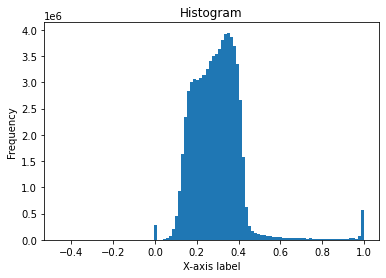

In [14]:
import matplotlib.pyplot as plt

plt.hist(b, bins=100)  # 'bins' parameter sets the number of bins in the histogram
plt.xlabel('X-axis label')    # Set the X-axis label (optional)
plt.ylabel('Frequency')       # Set the Y-axis label (optional)
plt.title('Histogram')        # Set the title of the histogram (optional)
plt.show()     

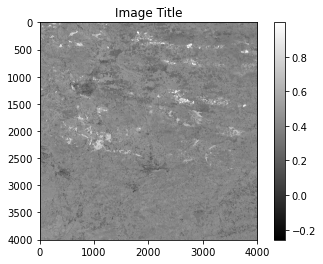

In [29]:
import matplotlib.pyplot as plt

# Display the 2D array as an image
plt.imshow(a[:,:,2], cmap='gray')  # Use 'cmap' for specifying the color map (e.g., 'gray')
plt.colorbar()  # Add a color bar to indicate pixel values
plt.title('Image Title')  # Set the title of the image (optional)
plt.show()